In [3]:
import pandas as pd

# Load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_data = pd.read_json('/content/drive/MyDrive/train.json')
test_data = pd.read_json('/content/drive/MyDrive/test.json')
print(train_data.shape)
train_data.head()

(7401, 2)


,reviews,sentiments
0,I bought this belt for my daughter in-law for ...,1
1,The size was perfect and so was the color. It...,1
2,"Fits and feels good, esp. for doing a swim rac...",1
3,These socks are absolutely the best. I take pi...,1
4,Thank you so much for the speedy delivery they...,1


In [5]:
train_data['sentiments'].value_counts(normalize = True)

,proportion
sentiments,
1,0.853804
0,0.146196


In [6]:
# tokenize
import nltk
from nltk.tokenize import word_tokenize
# stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language = 'english')

In [7]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords
# Set English stopwords
eng_stopwords = stopwords.words('english')
','.join(eng_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [9]:
# Remove negative words from stopwords
stopwords = eng_stopwords[:116]

In [10]:
# tokenize, stemming function (punctuations removed)
def tokenize(text):
    return[stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = stopwords)

In [12]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['reviews']).toarray()
X_train_tfidf.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


(7401, 9239)

In [13]:
# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(test_data['reviews']).toarray()
X_test_tfidf.shape

(1851, 9239)

In [14]:
# Get the labels
y_train = train_data['sentiments'].array
y_train.reshape(-1,1)

<NumpyExtensionArray>
[
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[0],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[0],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[0],
[0],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[0],
[0],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[0],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[0],
[0],
[1],
[1],
[1],
[1],
[1],
[0],
[0],
[1],
[1],
[1],
[1],
[

In [15]:
# Build RNN Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np

In [16]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

In [17]:
# Reshape input for RNN for LSTM
X_train_rnn = np.expand_dims(X_train, axis=1)  # Shape: (num_samples, 1, num_features)
X_val_rnn = np.expand_dims(X_val, axis=1)
X_test_rnn = np.expand_dims(X_test_tfidf, axis=1)

In [49]:
# Build the RNN model
model = Sequential()

# 1st hidden layer
model.add(LSTM(128, return_sequences = True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
# Input shape (samples, timesteps, features)
model.add(Dropout(0.5))

# 2nd hidden layer
model.add(LSTM(64, return_sequences=False))  # Set return_sequences=True to stack more LSTM layers
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │       4,796,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,845,889 (18.49 MB)

 Trainable params: 4,845,889 (18.49 MB)

 Non-trainable params: 0 (0.00 B)

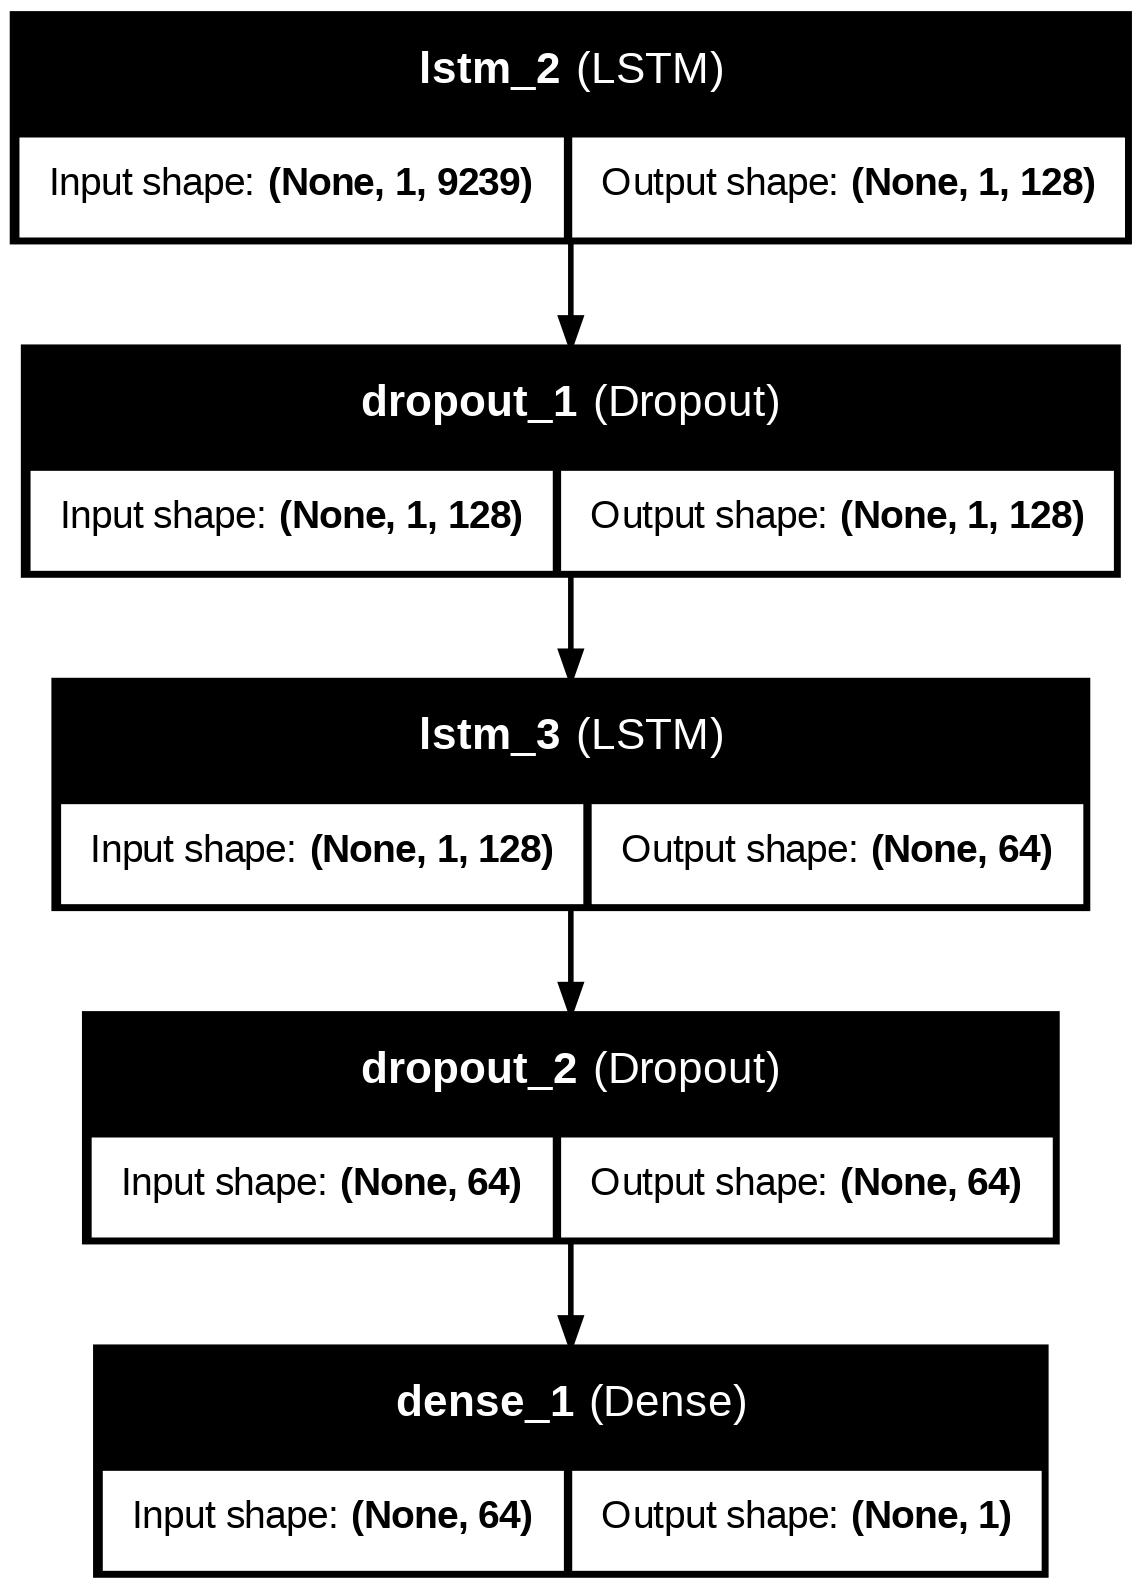

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model,
  show_shapes=True,
  show_layer_names=True)

In [58]:
# Set learning rate
from keras.optimizers import Adam
adam_optimizer = Adam(learning_rate = 0.00005)

In [59]:
# Compile the model
model.compile(optimizer=adam_optimizer,
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [60]:
# Early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [61]:
# Train the model
training_history = model.fit(X_train_rnn, Y_train, epochs=10, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Access the training and validation loss
train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 34s 104ms/step - accuracy: 0.8474 - loss: 0.2734 - val_accuracy: 0.8716 - val_loss: 0.2790
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.8508 - loss: 0.2579 - val_accuracy: 0.8750 - val_loss: 0.2709
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.8513 - loss: 0.2532 - val_accuracy: 0.8784 - val_loss: 0.2628
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.8789 - loss: 0.2207 - val_accuracy: 0.8784 - val_loss: 0.2552
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.8756 - loss: 0.2196 - val_accuracy: 0.8851 - val_loss: 0.2476
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8969 - loss: 0.1964 - val_accuracy: 0.8919 - val_loss: 0.2413
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.9144 - loss: 0.1747 - val_accuracy: 0.8978 - val_loss: 0.2351
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.9198 - loss: 0.1

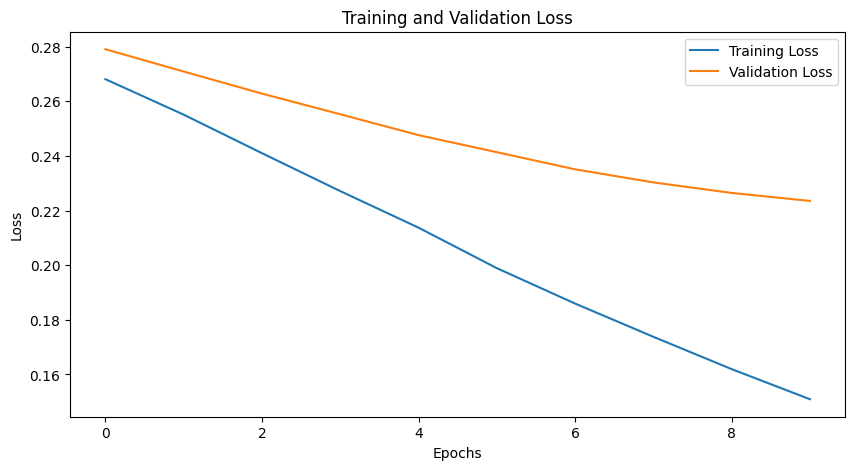

In [62]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
# Evaluate the model
# Specify testing data and labels
validation_loss, validation_accuracy = model.evaluate(X_val_rnn, Y_val)
# Print loss and accuracy
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9094 - loss: 0.2235
Validation loss:  0.2156689465045929
Validation accuracy:  0.9135718941688538


In [64]:
# Predict testing data
test_pred = model.predict(X_test_rnn)

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [69]:
binary_test_pred = (test_pred >= 0.5).astype(int)
print(binary_test_pred)

[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
